<a href="https://colab.research.google.com/github/alfafimel/IPWK8-CORE/blob/main/IPWK8_CORE_DECISION_TREES_%26_SVM_ELIZABETH_JOSEPHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFINING THE QUESTION**

## **a) Specifying the Question**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (polynomial and logistic approaches) given the datasets that will be provided

## **b) Defining the metrics for success**

The objective for this data includes investigating whether or ot the game is friendly while making the opredictions

## **c) Understanding the context**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below. ---- Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## **d) Recording the Experimental Design**

reading in the datasets

checking the data for duplicates and missinng data

dropping of duplicates and removal filling in of missing data values with zero

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Performing of EDA recording of observations.

Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

Perform any necessary feature engineering

Check of multicollinearity

Start building the model, Cross-validate the model

Compute RMSE

Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

Perform appropriate regressions on the data including your justification

Challenge your solution by providing insights on how you can make improvements.

## **e) Relevance of the data**

The data that was used for survey was obtained from an open datasource. this data is an aggregation by day of the number of goals scored and rankings of countries in the men's FIFA team. with it is a model that determines which team gets to be ranked where and how according to the years and goals.

# **DATA ANALYSIS**

### **Data Checking**

In [124]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
# reading datasets
df = pd.read_csv('http://bit.ly/hypothyroid_data')

In [126]:
# previewing the dataset
df.shape

(3163, 26)

In [127]:
# previewing the top of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [128]:
# previewing the tail of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [129]:
# printing the the number of unique values of the columns
print(df.nunique())

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64


In [130]:
# previewing the columns of the datasets
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [131]:
# replacing values 
df = df.replace({'?' : np.nan})
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,NaN


In [132]:
# replacing values and variables
df = df.replace({'f' : 0, 't' : 1})
df = df.replace({'n' : 0, 'y' : 1})

In [133]:
# using apply method 
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]] =df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]].apply(pd.to_numeric) 
print(df.dtypes) 

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object


In [117]:
df.sample(8)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
177,negative,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,1.5,1,1.7,1,75.0,1,0.84,1,89.0,0,NaN
2653,negative,67.0,F,0,0,0,0,0,1,0,0,0,0,1,0,NaN,0,NaN,1,55.0,1,1.04,1,53.0,1,23.0
764,negative,62.0,M,0,0,0,0,0,0,0,0,0,0,0,1,17.0,1,1.7,1,65.0,1,0.68,1,97.0,0,NaN
1565,negative,NaN,F,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1.6,1,87.0,1,0.93,1,94.0,0,NaN
2923,negative,37.0,M,0,0,0,0,0,0,0,0,0,0,0,1,0.3,1,2.1,1,110.0,1,0.92,1,120.0,0,NaN
2205,negative,36.0,M,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,1.6,1,79.0,1,0.90,1,88.0,0,NaN
196,negative,80.0,M,0,0,0,0,0,0,0,0,0,0,0,1,1.4,1,0.8,1,105.0,1,0.88,1,120.0,0,NaN
278,negative,59.0,F,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1,1.7,1,52.0,1,0.70,1,74.0,0,NaN


### **Note:**

In [119]:
## df.dropna()

##droping null values does away with a good section of the dataset leaving a dataset that is dysfunctional and insignificant.
# therefoore the null values in this dataset were not dropped

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40.0,F,0,0,0,0,0,0,0,0,0,0,0,1,70.0,1,0.4,1,3.9,1,0.83,1,5.0,1,28.0
37,hypothyroid,40.0,F,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.3,1,6.6,1,0.93,1,7.0,1,28.0


### **Data Cleaning**

In [135]:
# dropping unnecessary columns
df1 = df.drop(['TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'], axis = 1)
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [136]:
# checking count of null values
df1.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
dtype: int64

In [137]:
# checking the datatypes
df1.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

In [139]:
# filling the null values with zeros
df1.fillna(0)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,0,0,0,0,0,0,0,0,0,0,0
3159,negative,29.0,F,0,0,0,0,0,0,0,0,0,0,0
3160,negative,77.0,M,0,0,0,0,0,0,0,0,0,0,0
3161,negative,74.0,F,0,0,0,0,0,0,0,0,0,0,0


In [141]:
# checking for duplicates
df1.duplicated().any()

True

In [143]:
# dropping duplicates
df1.drop_duplicates(inplace=True)

In [144]:
# checking count of duplicate entries
df1.duplicated().sum()

0

In [146]:
# previewing the dataset
df1.shape

(914, 14)

In [147]:
# previewing the columns
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [148]:
# describing the numerical features
df1.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,873.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,48.325315,0.213348,0.049234,0.037199,0.094092,0.154267,0.160832,0.044858,0.074398,0.032823,0.002188,0.084245
std,20.374465,0.409896,0.216475,0.189353,0.292116,0.361402,0.367577,0.207105,0.262562,0.178270,0.046752,0.277907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
# checking for anomalies

q11 = df1['on_thyroxine'].quantile(.25)
q31 = df1['on_thyroxine'].quantile(.75)

iqr11 = q31 - q11
iqr11
##
q11, q31 = np.percentile(df1['on_thyroxine'], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

0.0 0.0


In [151]:
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [153]:
df1.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


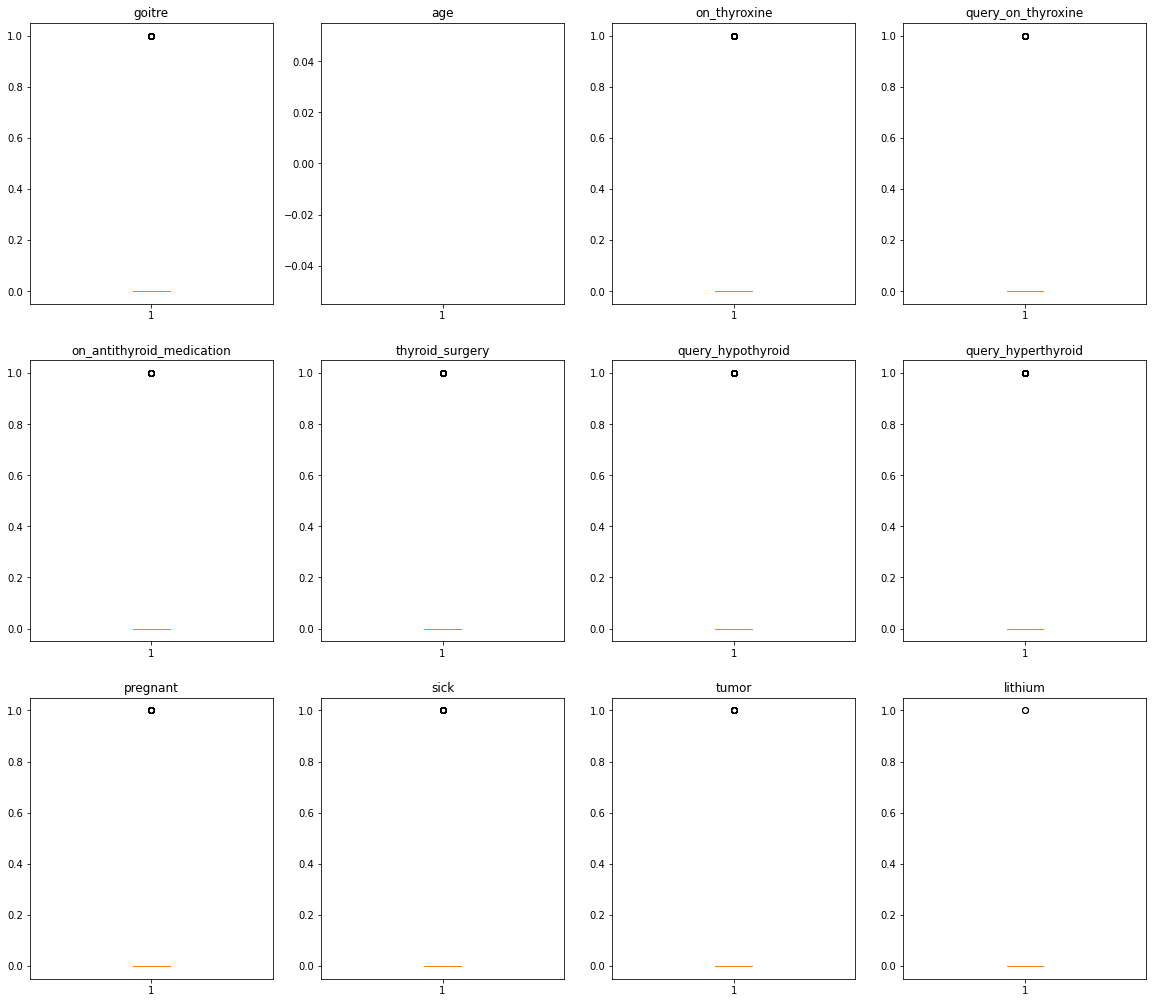

In [163]:
# checking for outliers
# saving the column names onto a dictionary
columns_dict = {'goitre': 1, 'age': 2, 'on_thyroxine': 3, 'query_on_thyroxine': 4, 'on_antithyroid_medication': 5, 'thyroid_surgery': 6,
       'query_hypothyroid': 7, 'query_hyperthyroid': 8, 'pregnant': 9, 'sick': 10, 'tumor': 11, 'lithium': 12}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df1[variable])
  plt.title(variable)

plt.show()

In [159]:
# dealing with the outliers using quantiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df2.shape)

# Printing the shape of our old dataset
print(df1.shape)

(226, 14)
(914, 14)


# **EXPLORATORY DATA ANALYSIS**

## **a) Univariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

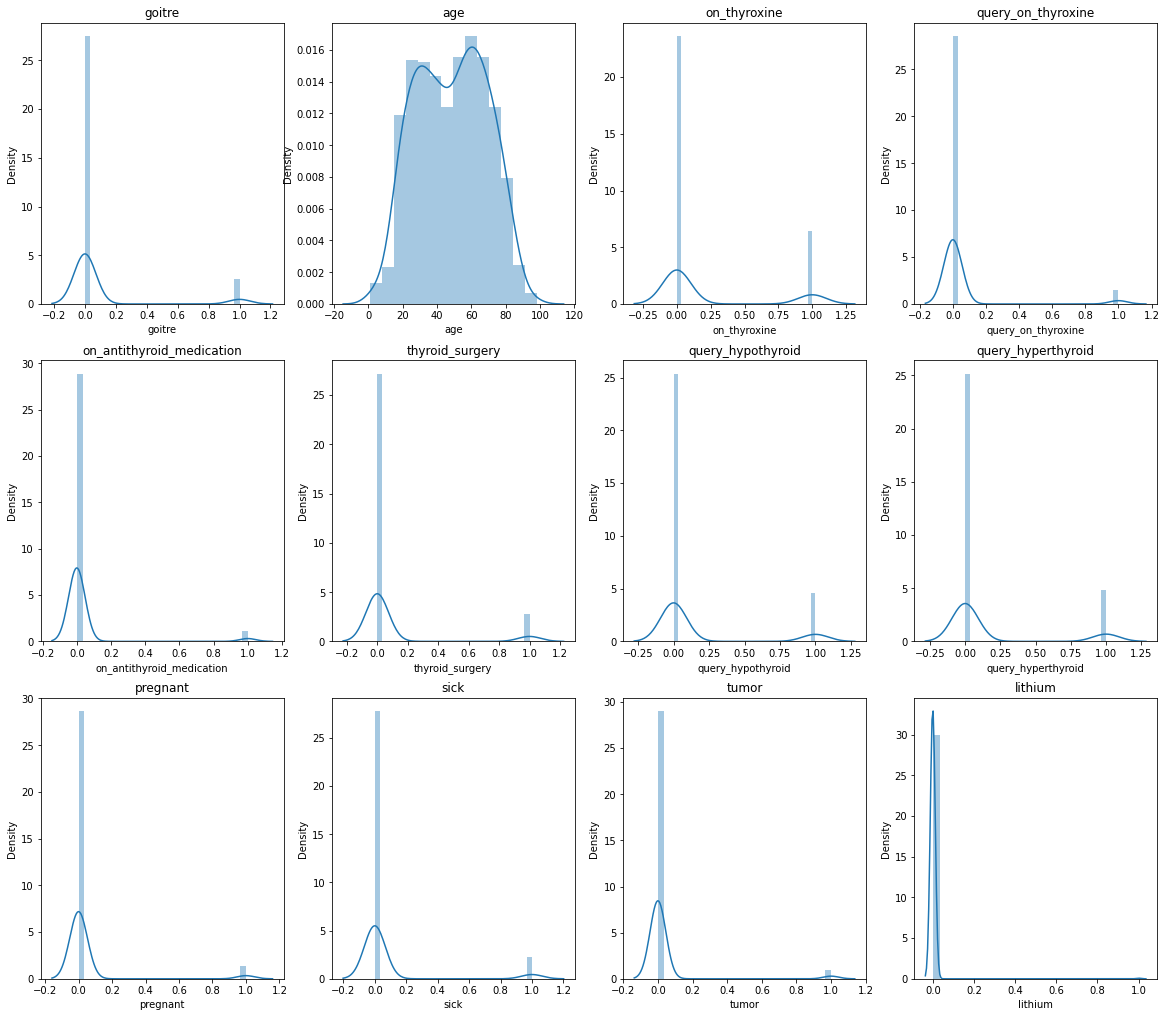

In [171]:
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

In [172]:
# describing the statistical features of the data
df1.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,873.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,48.325315,0.213348,0.049234,0.037199,0.094092,0.154267,0.160832,0.044858,0.074398,0.032823,0.002188,0.084245
std,20.374465,0.409896,0.216475,0.189353,0.292116,0.361402,0.367577,0.207105,0.262562,0.178270,0.046752,0.277907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **b) Bivariate Analysis**

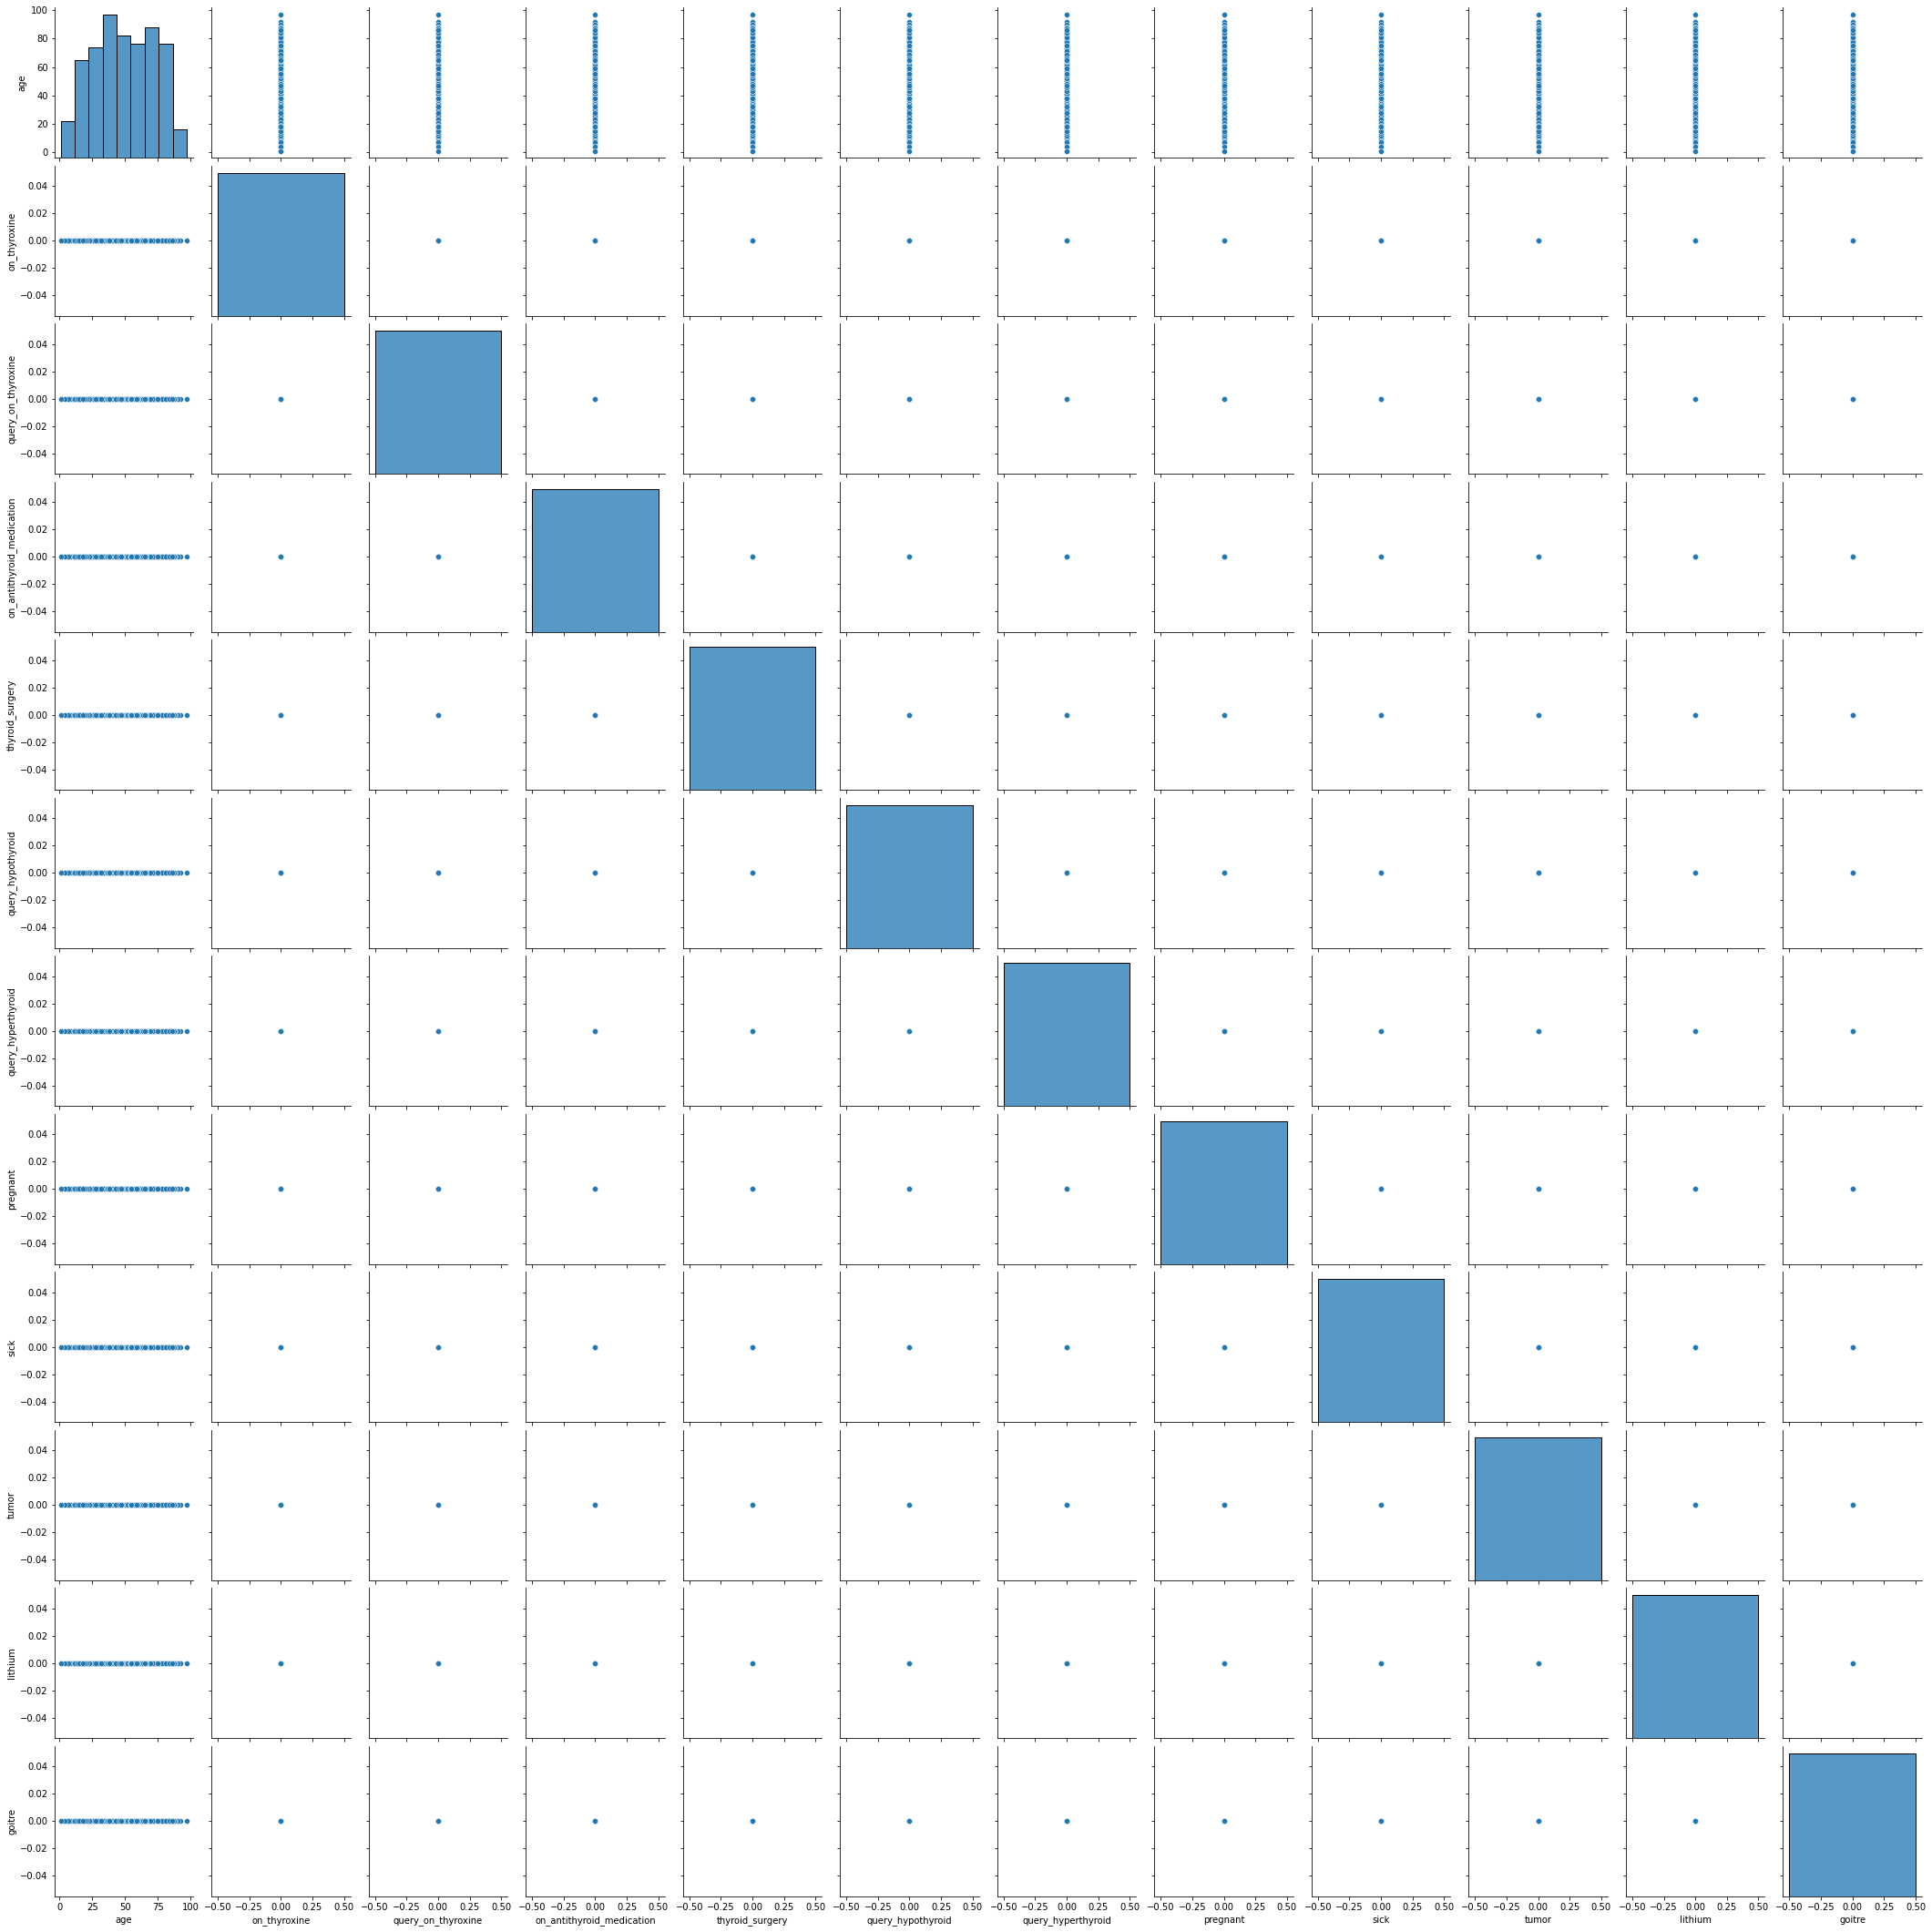

In [182]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

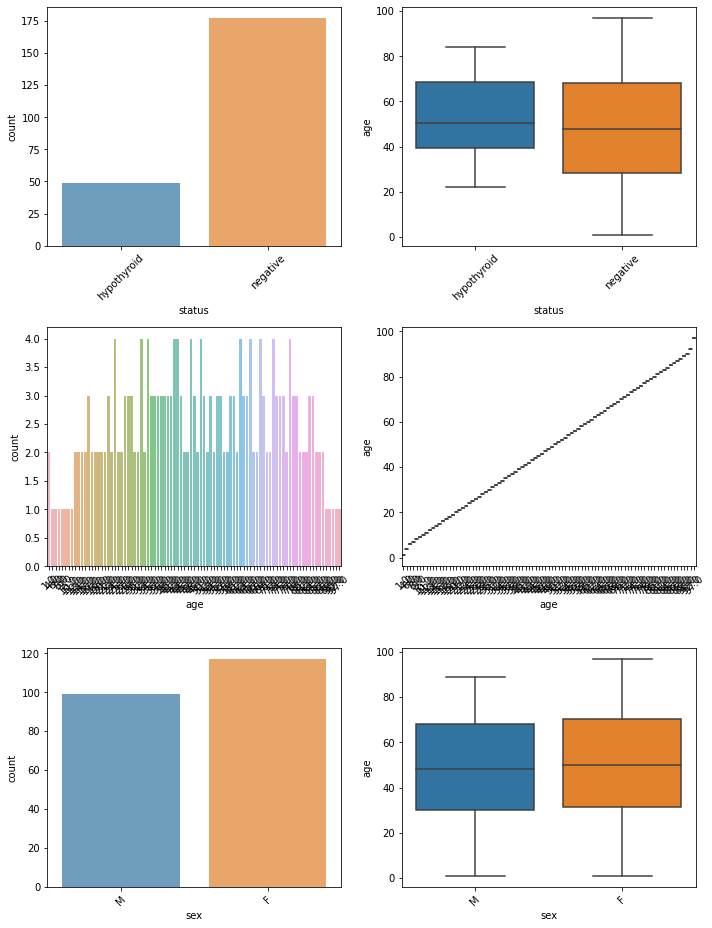

In [176]:
### Categoric Feature Analysis
# Boxplot gives a good idea about how the Price is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df2.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df2.columns[c], alpha=0.7, data=df2, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df2, x=df2.columns[c], y='age', ax=ax)
        c = c + 1
fig.tight_layout()

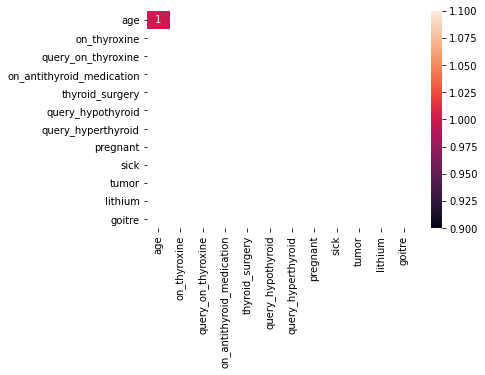

In [183]:
# plotting the correlation using a heatmap
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [184]:
# tabulating the correlation coefficients
corr = df2.corr()
corr

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_thyroxine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
query_on_thyroxine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_antithyroid_medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thyroid_surgery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
query_hypothyroid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
query_hyperthyroid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tumor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **c) Multivariate Analysis**

### **i) Factor Analysis**

In [198]:
# Performing adequacy tests
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 4. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.
#The p vlaue is 0 the observed matrix is not an identity matrix.

(316.3276219649843, 4.1645423146182944e-27)

### **ii) Principal Component Analysis**

In [214]:
# filling null values with zeros
df2 = df2.fillna(0)

In [209]:
# dropping unnecessary columns
df2 = df2.drop(['status'], axis=1)

In [219]:
# converting variables from float to int 
df2['age'] = df2['age'].astype(int)

In [216]:
df2.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
dtype: int64

In [229]:
df3 = df2.drop(['sex'], axis=1)

In [230]:
# printing the shape and datatypes
print(df3.shape)
print(df3.dtypes)

(226, 12)
age                          int64
on_thyroxine                 int64
query_on_thyroxine           int64
on_antithyroid_medication    int64
thyroid_surgery              int64
query_hypothyroid            int64
query_hyperthyroid           int64
pregnant                     int64
sick                         int64
tumor                        int64
lithium                      int64
goitre                       int64
dtype: object


In [232]:
# preprocessing
X = df3.iloc[:, 0:11].values
y = df3.iloc[:, 11].values

In [233]:
# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [235]:
# normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [236]:
# applyting PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [237]:
# explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [238]:
# using 1 principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [239]:
# training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [242]:
# performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[46]]
Accuracy 1.0


### **iii) Linear Discriminant Analysis**

In [253]:
# preprocessing
X = df3.iloc[:, 0:11].values
y = df3.iloc[:, 11].values

In [254]:
# divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [255]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [256]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 1 - 1) = 0 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [258]:
# Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, 
# which is greater than the accuracy achieved with one principal component, which was 93.33%.

[[46]]
Accuracy1.0


# **IMPLEMENTING THE SOLUTION**

## **PART 1: DECISION TREES**

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

## **PART 2: SUPPORT VECTOR MACHINES (SVM)**

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

# **CHALLENGING THE SOLUTION**

Challenging the solution
The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.

[ ]
12


# **FOLOW UP QUESTIONS**

In [ ]:
9. Follow up questions
At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data?
b). Do we need other data to answer our question?
c). Did we have the right question?